# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [17]:

# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# фиксируем seed для воспроизводимости результатов
random_state = 42

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [19]:
#функции для пункта 1
def Accuracystats(X_test, X_train, y_train, y_test, key, metrics):
    """
    Вычисляет точность (accuracy) модели KNeighborsClassifier для различных значений k (количество соседей).

    Параметры:
    - X_test: Тестовые данные (признаки).
    - X_train: Обучающие данные (признаки).
    - y_train: Обучающие данные (целевые значения).
    - y_test: Тестовые данные (целевые значения).
    - key: Ключ, указывающий, какие данные использовать для оценки ('test' или 'train').
    - metrics: Метрика расстояния для KNeighborsClassifier (например, 1 для манхэттенского расстояния, 2 для евклидова).

    Возвращает:
    - stats: Массив numpy с точностью (accuracy) для каждого значения k от 1 до 20.
    """
    # Словарь для хранения тестовых и обучающих данных (признаки)
    xdata_for_testing = {
        'test': X_test,
        'train': X_train
    }

    # Словарь для хранения тестовых и обучающих данных (целевые значения)
    ydata_for_testing = {
        'test': y_test,
        'train': y_train
    }

    # Список для хранения точности (accuracy) для каждого k
    accuracy_by_k = []

    # Перебираем значения k от 1 до 20
    for i in range(1, 21):
        # Создаем модель KNeighborsClassifier с текущим значением k и заданной метрикой
        model = KNeighborsClassifier(n_neighbors=i, algorithm="brute", p=metrics)

        # Обучаем модель на обучающих данных
        model.fit(X_train, y_train)

        # Предсказываем целевые значения для выбранных данных (тестовых или обучающих)
        y_pred = model.predict(xdata_for_testing[key])

        # Вычисляем точность (accuracy) для предсказанных значений
        score = accuracy_score(ydata_for_testing[key], y_pred)

        # Добавляем точность в список
        accuracy_by_k.append(score)

    # Преобразуем список в массив numpy для удобства работы
    stats = np.array(accuracy_by_k)

    # Возвращаем массив с точностью для каждого k
    return stats

import matplotlib.pyplot as plt

def Scatter(k, res_test, res_train, key):
    """
    Строит scatter-график для визуализации точности (accuracy) в зависимости от значения k.

    Параметры:
    - k: Список значений гиперпараметра k (количество соседей).
    - res_test: Точность (accuracy) для тестовых данных.
    - res_train: Точность (accuracy) для обучающих данных.
    - key: Значение метрики расстояния (p), используемое в модели.

    Возвращает:
    - None (отображает график).
    """
    # Создаем новое окно для графика
    plt.figure()

    # Строим scatter-график для тестовых данных
    plt.scatter(k, res_test, label='для тестовых данных при p = 'f"{key}")

    # Строим scatter-график для обучающих данных
    plt.scatter(k, res_train, label='для обучающих данных при p = 'f"{key}")

    # Подписываем ось X
    plt.xlabel('Значения гиперпараметра k')

    # Подписываем ось Y
    plt.ylabel('Accuracy')

    # Добавляем легенду
    plt.legend()

    # Отображаем график
    plt.show()

In [20]:
digits = datasets.load_digits() ## функция скачивающая картинки 8x8 из sklearn
X, y = digits["images"].reshape(len(digits["images"]), -1), digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)
print(X_train.shape[0])


1257


Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

In [21]:
stats_test_p2 = Accuracystats(X_test, X_train,y_train, y_test, "test", 2) ## внутри функций прописанных выше мы проделываем наш KNN и возвращаем y_pred который stats
stats_train_p2 = Accuracystats(X_test, X_train, y_train, y_test, "train", 2)
k = np.array([i for i in range(1,21)])


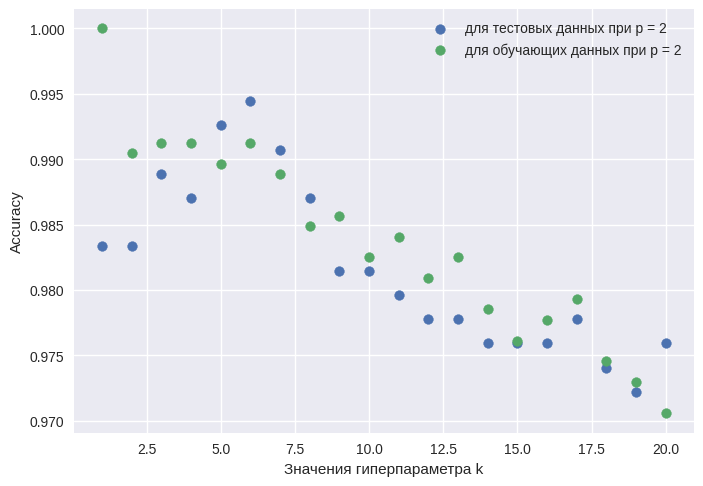

In [22]:
##Далее вызываем scatter ячейки
plt.style.use("seaborn-v0_8")
Scatter(k, stats_test_p2, stats_train_p2, 2)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** ...

Потому что KNN запоминает тренировочную выборку, а потом уже по ней ищет ближайших для каждых значений из точек для которых мы хотим сделать предикт при выбранном значении k. Но посколкьу KNN помнит тестовые данные, то для каждой тестовой точки ближайшей будет она сама, поэтому и будет 100%.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

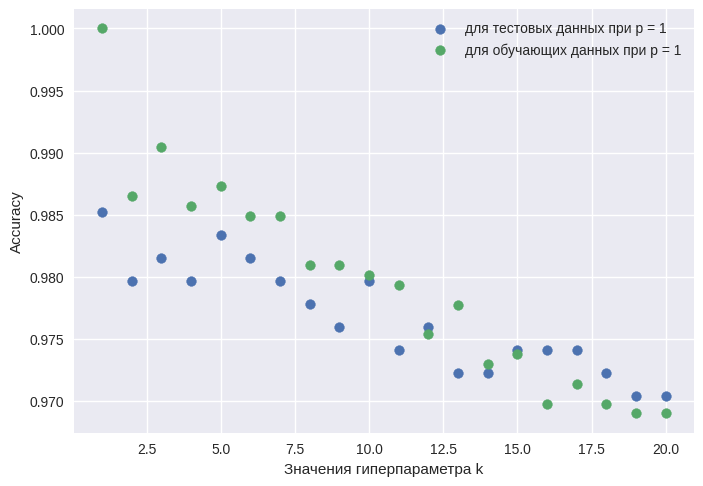

In [23]:
stats_test_p1 =  Accuracystats(X_test, X_train, y_train, y_test, "test", 1)
stats_train_p1 = stats_train_p2 = Accuracystats(X_test, X_train, y_train, y_test, "train", 1)
Scatter(k, stats_test_p1, stats_train_p1, 1)

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** ...

В манхэттенской метрике у нас считается расстояние между точками с помощью сумм. Эти суммы не превосходят 16*64, получится, что у нас всего не так много позиций из-за этого огромное число точек может наслаиваться друг на друга, поэтому евлидово расстояние, как мне кажется помогает с большей уверенностью различать точки расстояние между которыми переменно. То есть когда диапазон разброса не очень большой, как в нашей задаче, брать манхэттенскую метрику неразумно.

**Выводы:** ...

Подбор параметров $ k $ и $p$ (метрики) для каждой задачи — это особенный процесс. Необходимо оценивать разброс данных, наличие выбросов и другие особенности, так как гиперпараметры зависят от конкретной задачи. Не существует универсального набора $(k, p)$, который бы оптимально решал задачу классификации с помощью метода k-Nearest Neighbors (KNN) для всех случаев. Это сложная задача, требующая детального анализа.

Например, как можно заметить в нашей задаче, для разных метрик мы получили различные значения оптимальных $k$. Более того, даже для разных наборов тестируемых данных оптимальные значения $k$ могут отличаться. Поэтому подбор оптимальных $k$ и $p$ — это нетривиальная задача, которая требует тщательного анализа данных и экспериментов.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [24]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [25]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [26]:
titanic_correct = titanic.dropna(subset=[*features_columns,target_column])
X, y = titanic_correct[features_columns], titanic_correct[target_column]
print(titanic.shape[0] - titanic_correct.shape[0]) #вычел из предыдущего числа столбцов число столбцов с некорректными данными

177


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

**Посмотрим на выживаемость взависимости от гендера**

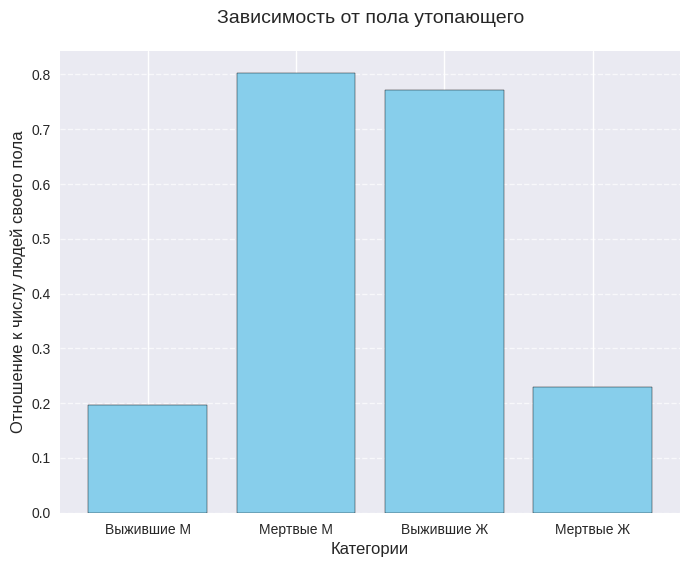

In [28]:
## Сначала посмотрим на данные взависимости от пола, т.е на выживших мужчин и женщин
X_alive = X_train[y_train.loc[X_train.index] == 1]
X_died = X_train[y_train.loc[X_train.index] == 0]
X_train_alive_man = X_train[(X_train['Sex'] == 'male') & (y_train.loc[X_train.index] == 1)]
X_train_noalive_man = X_train[(X_train['Sex'] == 'male') & (y_train.loc[X_train.index] == 0)]
X_train_alive_woman = X_train[(X_train['Sex'] == 'female') & (y_train.loc[X_train.index] == 1)]
X_train_noalive_woman = X_train[(X_train['Sex'] == 'female') & (y_train.loc[X_train.index] == 0)]

data = [X_train_alive_man.shape[0]/(X_train_noalive_man.shape[0]+X_train_alive_man.shape[0]), X_train_noalive_man.shape[0]/(X_train_noalive_man.shape[0]+X_train_alive_man.shape[0]), X_train_alive_woman.shape[0]/(X_train_noalive_woman.shape[0]+X_train_alive_woman.shape[0]), X_train_noalive_woman.shape[0]/(X_train_noalive_woman.shape[0]+X_train_alive_woman.shape[0])]
plt.figure(figsize=(8, 6))  # Размер графика

plt.bar(range(len(data)), data, color='skyblue', edgecolor='black')  # Гистограмма

# Настройка осей и подписей
plt.xticks(range(len(data)), labels=['Выжившие М', 'Мертвые М', 'Выжившие Ж', 'Мертвые Ж'])  # Подписи по оси X
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Отношение к числу людей своего пола', fontsize=12)
plt.title('Зависимость от пола утопающего', fontsize=14, pad=20)

# Добавление сетки
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показать график
plt.show()


**Посмотрим выживаемость мужчин взависимости от возраста и цены билета**

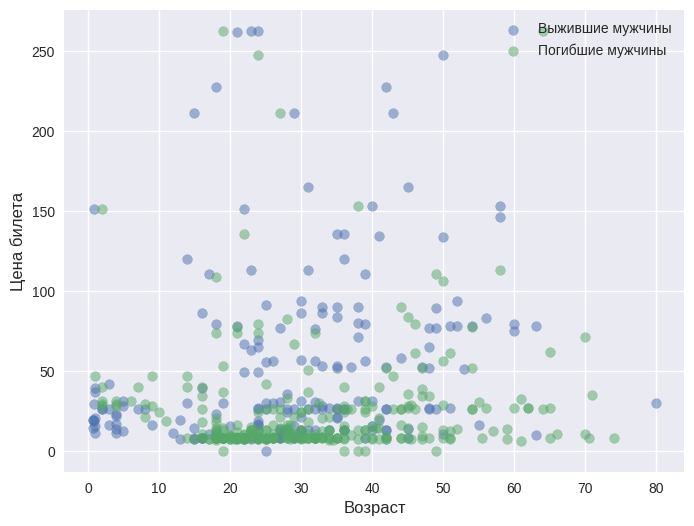

In [29]:


plt.figure(figsize=(8, 6))
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Цена билета', fontsize=12)
plt.scatter(X_alive['Age'], X_alive['Fare'], alpha = 0.5, label="Выжившие мужчины")
plt.scatter(X_died['Age'], X_died['Fare'], alpha = 0.5, label='Погибшие мужчины')
plt.legend(loc='upper right')

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

 Первому дереву будет соответствовать второе распределение точек. По графику можем заметить, что дети до 10 лет выживают с большей вероятностью на train выборке, поэтому в решающем дереве при признаке age < 10 сразу предполагается, что с большой долей вероятности человек выживет. При этом, если возраст больше 10 лет на распределение точек очень сильно начинает влиять цена билета, как мы видим, среди погибших огромное количество людей купивших билет менее чем за 50 единиц валюты и в этой области заметно преобладает число погибших среди купивших билет за эту цену, однако, если обратить внимание, можно заметить, что люди купившие билет за более чем 50 единиц валюты в большинстве своем выжили. Поэтому я получил следующее дерево глубины 2.

**Дерево 2:**

Если обратить внимание на гистограммы, можно заметить, что 80% женщин выживает, при этом 80% мужчин погибает, поэтому я получил решающее дерево глубины 1, которое делает вывод взависимости от гендера утопающего.

Реализуйте полученные деревья по шаблону

In [30]:


def tree_age_fair(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.

    Логика предсказания:
    - Если возраст (Age) меньше 10, предсказание = 1.
    - Если стоимость билета (Fare) больше 50, предсказание = 1.
    - В остальных случаях предсказание = 0.
    """
    # Создаем пустой Series для хранения предсказаний с теми же индексами, что и features
    predicted = pd.Series(index=features.index, dtype=int)

    # Проходим по каждой строке в DataFrame
    for i in features.index:
        # Проверяем условие: если возраст меньше 10
        if features.loc[i]["Age"] < 10:
            predicted.loc[i] = 1  # Предсказание = 1
        # Проверяем условие: если стоимость билета больше 50
        elif features.loc[i]["Fare"] > 50:
            predicted.loc[i] = 1  # Предсказание = 1
        # Если ни одно из условий не выполнено
        else:
            predicted.loc[i] = 0  # Предсказание = 0

    # Возвращаем Series с предсказаниями
    return predicted


In [31]:


def tree_gender(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака на основе пола (Sex) для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.

    Логика предсказания:
    - Если пол (Sex) равен 'female', предсказание = 1.
    - В остальных случаях предсказание = 0.
    """
    # Создаем пустой Series для хранения предсказаний с теми же индексами, что и features
    predicted = pd.Series(index=features.index, dtype=int)

    # Проходим по каждой строке в DataFrame
    for i in features.index:
        # Проверяем условие: если пол равен 'female'
        if features.loc[i]["Sex"] == 'female':
            predicted.loc[i] = 1  # Предсказание = 1
        # Если условие не выполнено
        else:
            predicted.loc[i] = 0  # Предсказание = 0

    # Возвращаем Series с предсказаниями
    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [32]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """
    counter = 0;
    for i in target.index:
      counter += (target.loc[i] == predicted.loc[i])
    return counter/target.shape[0];

In [33]:
y_pred_age = tree_age_fair(X_test)
print(accuracy(y_test, y_pred_age))
y_pred_gender = tree_gender(X_test)
print(accuracy(y_test, y_pred_gender))

0.6790697674418604
0.7534883720930232


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** Мне кажется что признаки являются неудобными в изучении относительно 'Fare', потому что расстояние 'Fare' является наиболее решающим из-за большего домена, поэтому наверное Pclass аналогичным образом тяжело анализировать в этой ситуации.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [34]:
#функции для пункта 3, чтобы ниже ими не спамить

def Scatter_titanic(k, res_test):
    plt.figure()
    plt.scatter(k, res_test)
    plt.xlabel('Значения гиперпараметра k')
    plt.ylabel('Accuracy для тестовых данных')
    plt.legend()
    plt.show()

def Accuracystats_titanic_withoutminmax(X_test, X_train, y_train, y_test):
  accuracy_by_k = []
  for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i, algorithm="brute",p = 2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracy_by_k.append(score)
  stats = np.array(accuracy_by_k)
  return stats

def Accuracystats_with_preprocessing(data_X_test, data_X_train, y_train, y_test, key):
  data_X = {
      "train":data_X_train,
      "test":data_X_test
  }
  data_Y = {
      "train":y_train,
      "test":y_test
  }
  accuracy_by_k = []
  for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i, algorithm="brute",p = 2)
    model.fit(data_X_train, y_train)
    y_pred = model.predict(data_X[key])
    score = accuracy_score(data_Y[key], y_pred)
    accuracy_by_k.append(score)
  stats = np.array(accuracy_by_k)
  return stats

<ipython-input-34-52bb8b2f0e52>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


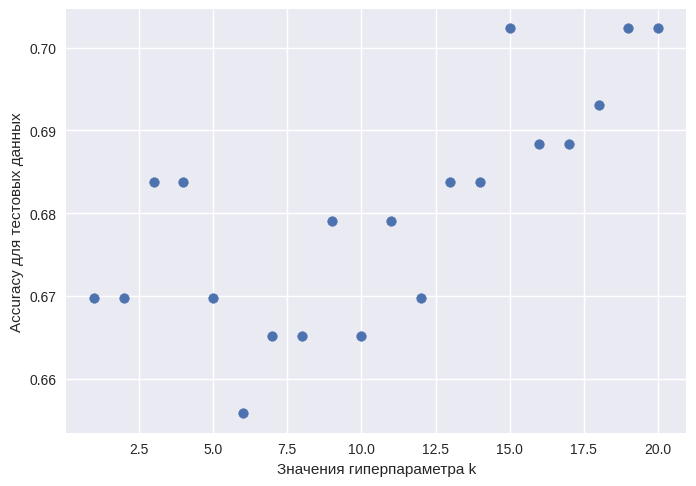

In [35]:
##KNN without minmax
features_columns = ["Pclass", "Age", "Sex", "Fare"]
target_column = "Survived" # целевой признак, т.е тот который мы хотим предсказывать

X, y = titanic_correct[features_columns], titanic_correct[target_column]

X.loc[X['Sex'] == 'male', 'Sex'] = 0
X.loc[X['Sex'] == 'female', 'Sex'] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

stats = Accuracystats_titanic_withoutminmax(np.array(X_test), np.array(X_train), np.array(y_train),np.array(y_test))

Scatter_titanic(k, stats)

Можем заметить, что результат в данном случае в самом оптимально подобранном $k$ все равно работает с большей ошибкой, чем классификация по признаку "Sex".

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [36]:
print(X_train.apply(max)) #вывод максимального для каждого столбца
print(X_train.apply(min)) #вывод минимального для каждого столбца

Pclass      3.0
Age        80.0
Sex         1.0
Fare      263.0
dtype: float64
Pclass    1.00
Age       0.67
Sex       0.00
Fare      0.00
dtype: float64


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  ...


По сравнению с Age Pclass (например), будет давать очень маленькие расстояния (т.е разброс по одной из осей будет очень большой), и будет работать так, что Age учитывается сильнее, чем Pclass или же Sex, хотя мы могли заметить, строя решающее дерево, что тот же Sex - довольно важный признак.

Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** ...


При больших разбросах данных, огромное число данных будет у 0 и единицы, также выбросы могут очень сильно искажать данные, что будет влиять на прямую формулу пересчета. Также как будто относительность у некоторых параметроов теряется, а это может быть важно для конкретной задачи

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [37]:
  transformer = MinMaxScaler()
  transformer.fit(X_train)
  data_X_train = transformer.transform(X_train)
  data_X_test = transformer.transform(X_test)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [38]:
for i in range(data_X_train.shape[1]):
  print(max(data_X_train[i]))
for i in range(data_X_train.shape[1]):
  print(min(data_X_train[i]))
#Вывели все максимумы и минимумы, как мы можем видеть, что разброс в этот раз не такой сильный

1.0
1.0
1.0
1.0
0.0
0.05458212529938233
0.0
0.0


Обучите модель и сравните результат предсказаний со стандартизацией и без.

<ipython-input-34-52bb8b2f0e52>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


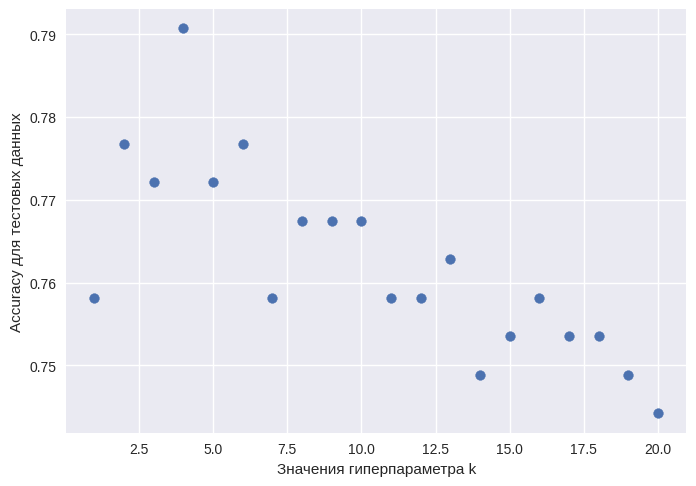

In [39]:
stats_test = Accuracystats_with_preprocessing(np.array(data_X_test), np.array(data_X_train), np.array(y_train), np.array(y_test), "test")
stats_train =  Accuracystats_with_preprocessing(np.array(data_X_test), np.array(data_X_train), np.array(y_train), np.array(y_test), "train")
Scatter_titanic(k, stats_test)

С помощью нормализации мы смогли учесть набор данных, который в прошлый раз давал меньший вклад в метрику на фоне остальных признаков, например, Pclass и Sex, один из которых немаловажен как известно из пункта 2 задачи. За счет решения о нормализации мы смогли в лучшем случае увеличить accuracy до 79 с 68. Притом, что для любого k из диапазона от 1 до 20 данная нормализация повысила точность определения выживаемости

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

In [40]:
stats_test = Accuracystats_with_preprocessing(np.array(data_X_test), np.array(data_X_train), np.array(y_train), np.array(y_test), "test")
stats_train =  Accuracystats_with_preprocessing(np.array(data_X_test), np.array(data_X_train), np.array(y_train), np.array(y_test), "train")